In [1]:
# Check GPU (recommended: T4/A100/V100)
!nvidia-smi

# Install YOLOv8 (Ultralytics)
!pip install -U ultralytics

# (Optional) Restart kernel if Colab prompts you to after install


Sat Sep 20 05:35:22 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   55C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="1rpZXO56ELQn3KgcdQ68")
project = rf.workspace("kunnusherry").project("my-first-project-sm1xe-7dt65")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 82.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to My-First-Project-1 in yolov8:: 100%|██████████| 1364/1364 [00:00<00:00, 5487.62it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
DATASET_DIR = "/content/My-First-Project-1"  # <-- change if needed
!ls -R "$DATASET_DIR"


/content/My-First-Project-1:
data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid

/content/My-First-Project-1/test:
images	labels

/content/My-First-Project-1/test/images:
135_jpg.rf.f2fa26625493892b72ea776dfd586d25.jpg
27_jpg.rf.6a47754e24fecfe4474e63307d36f4e5.jpg
31_jpg.rf.73a7c1840c4748284ae3803c05e0c6d0.jpg
69_jpg.rf.46120acff25781923919dc21463a43f4.jpg
96_jpg.rf.a287b616df68fa4e32460b35a5126c66.jpg
img-105_jpg.rf.4315f877ae2b1a7765b1fec5ec1ba630.jpg
img-107_jpg.rf.c7d7f14f47b4181f063312d4df21bd2f.jpg
img-146_jpg.rf.810a8a1c43175ae990e3218e34b7f308.jpg
img-161_jpg.rf.85e8832d05ac5dc6724249b167339eae.jpg
img-168_jpg.rf.17d584c85af820e90a941d6d33028f0c.jpg
img-179_jpg.rf.748f3ceba2dbe3d3c5fc1b472b96b343.jpg
img-195_jpg.rf.645e43a943875b332059dd6d32340463.jpg
img-196_jpg.rf.10a60a36354cffd705d95d259e2624c5.jpg
img-217_jpg.rf.062befc3f3b486ad42fe778bcdfcce3a.jpg
img-238_jpg.rf.aaef2ab916a3ed7be1c0ff8d36b446aa.jpg
img-23_jpg.rf.cd8a4acb9d39ce0d197f907d8110c31c.jpg
im

In [4]:
!sed -n '1,120p' "$DATASET_DIR/data.yaml"


names:
- pothole
nc: 1
roboflow:
  license: Public Domain
  project: my-first-project-sm1xe-7dt65
  url: https://universe.roboflow.com/kunnusherry/my-first-project-sm1xe-7dt65/dataset/1
  version: 1
  workspace: kunnusherry
test: ../test/images
train: ../train/images
val: ../valid/images


In [5]:
# CLI style
!yolo task=detect mode=train model=yolov8n.pt data="$DATASET_DIR/data.yaml" epochs=100 imgsz=640 batch=16 device=0 workers=8


Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/My-First-Project-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True,

In [11]:
from ultralytics import YOLO

DATA_YAML = "/content/My-First-Project-1/data.yaml"  # adjust if needed

model = YOLO("/content/runs/detect/train/weights/best.pt")   # or YOLO(last_pt) if best not yet created

# Full validation on your val set (from data.yaml)
metrics = model.val(data=DATA_YAML, imgsz=640)  # returns a Metrics object
print(metrics.results_dict)  # e.g., {'metrics/mAP50(B)': 0.86, ...}


Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2027.2±937.6 MB/s, size: 62.8 KB)
val: Scanning /content/My-First-Project-1/valid/labels.cache... 139 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 139/139 276.7Kit/s 0.0s
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 330, len(boxes) = 339. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.6it/s 2.5s
                   all        139        339      0.809      0.699      0.773      0.511
Speed: 1.9ms preprocess, 7.0ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to /content/runs/detect/val

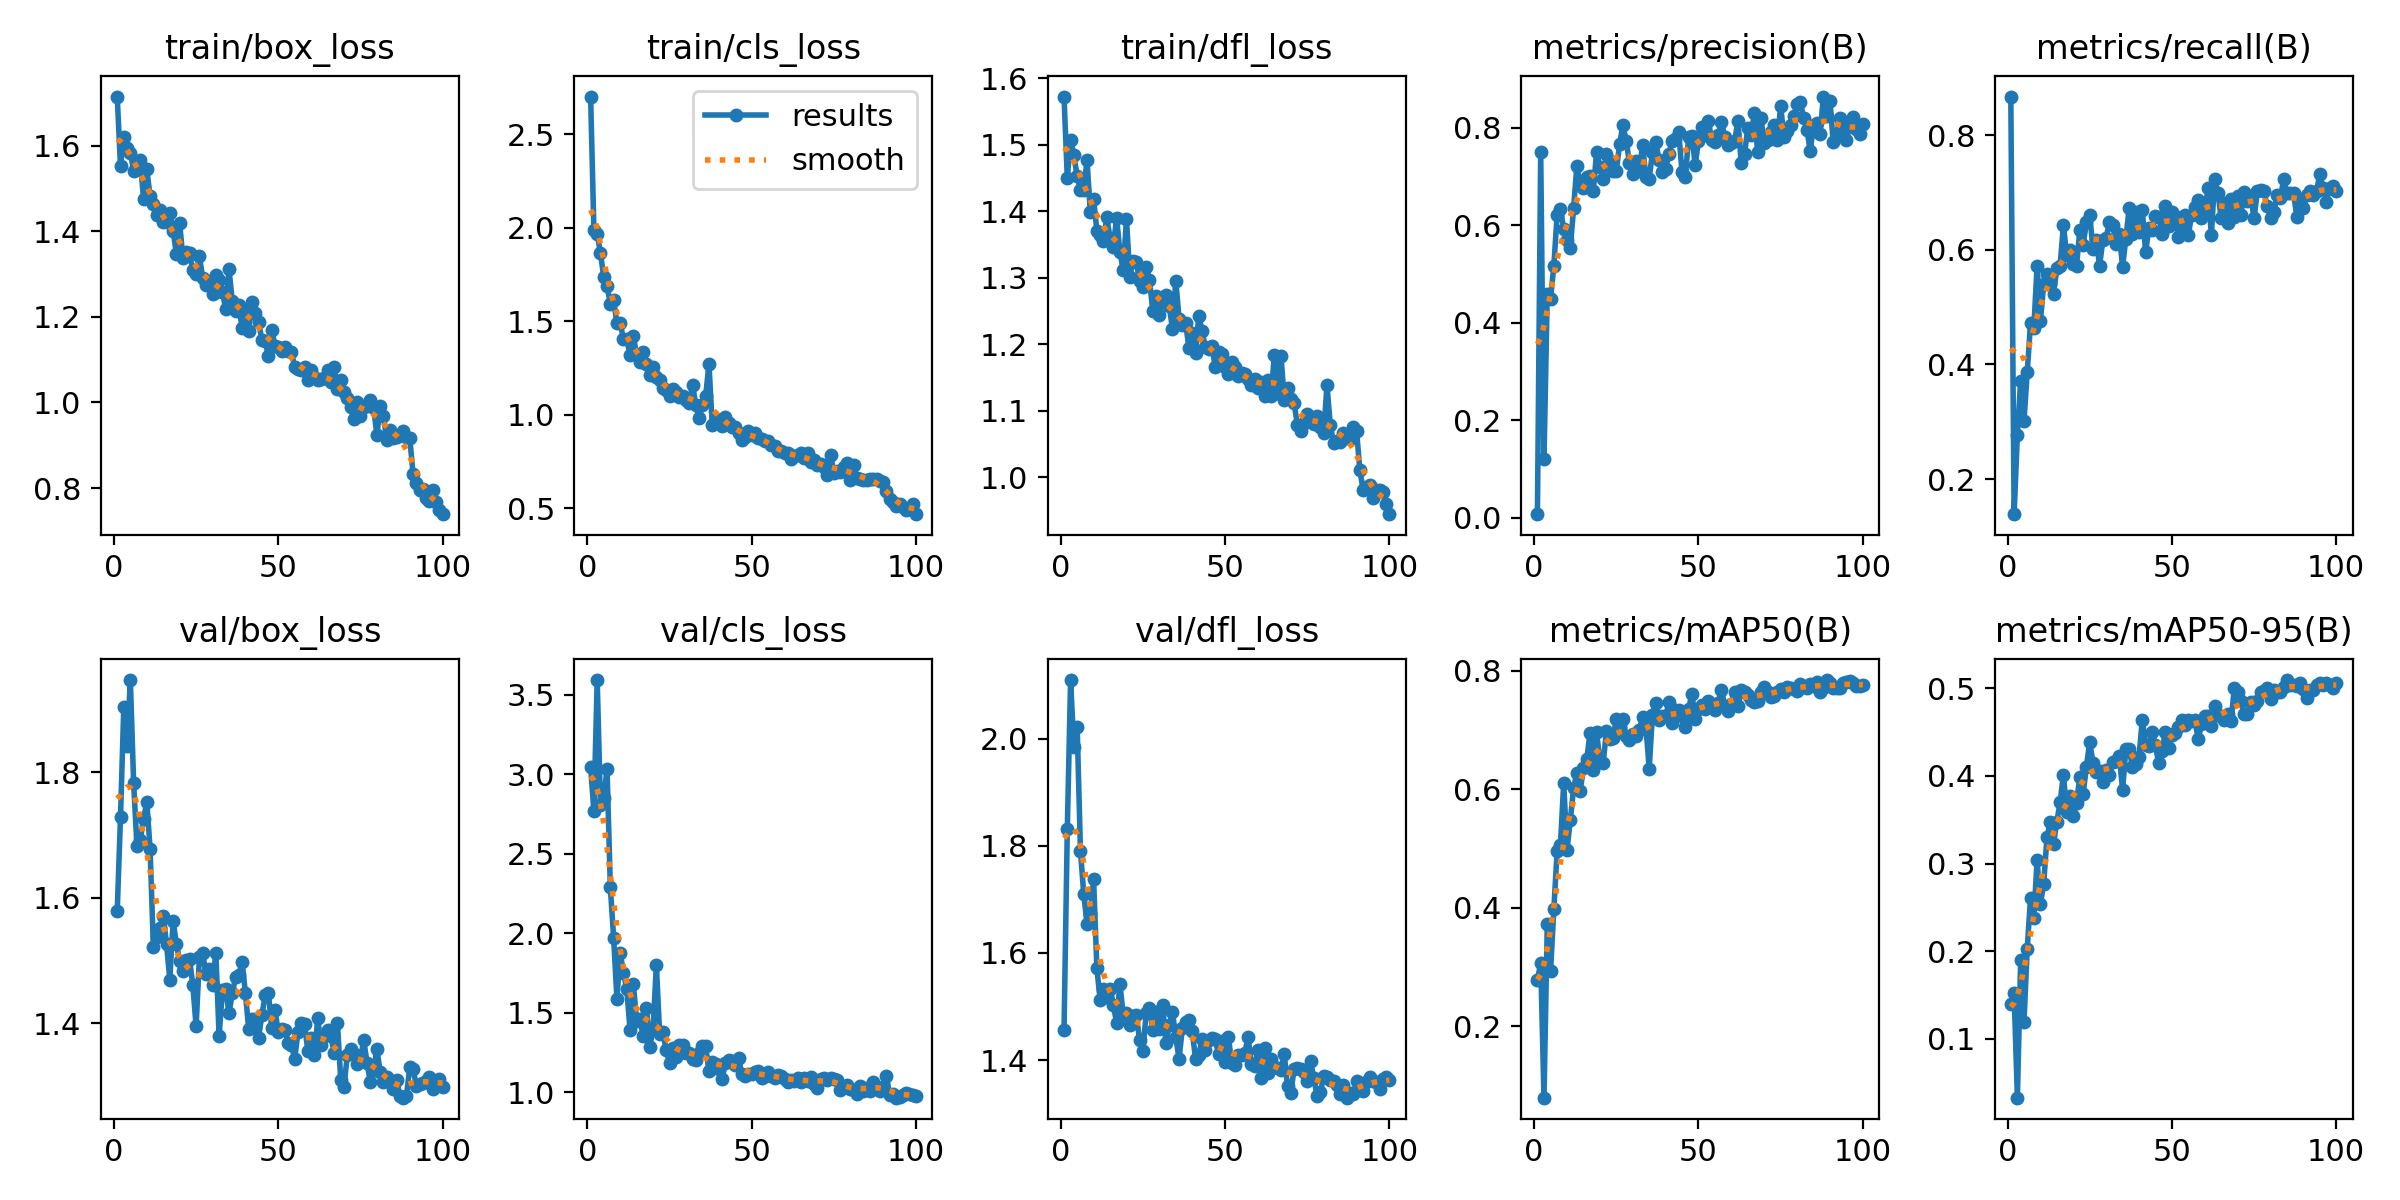

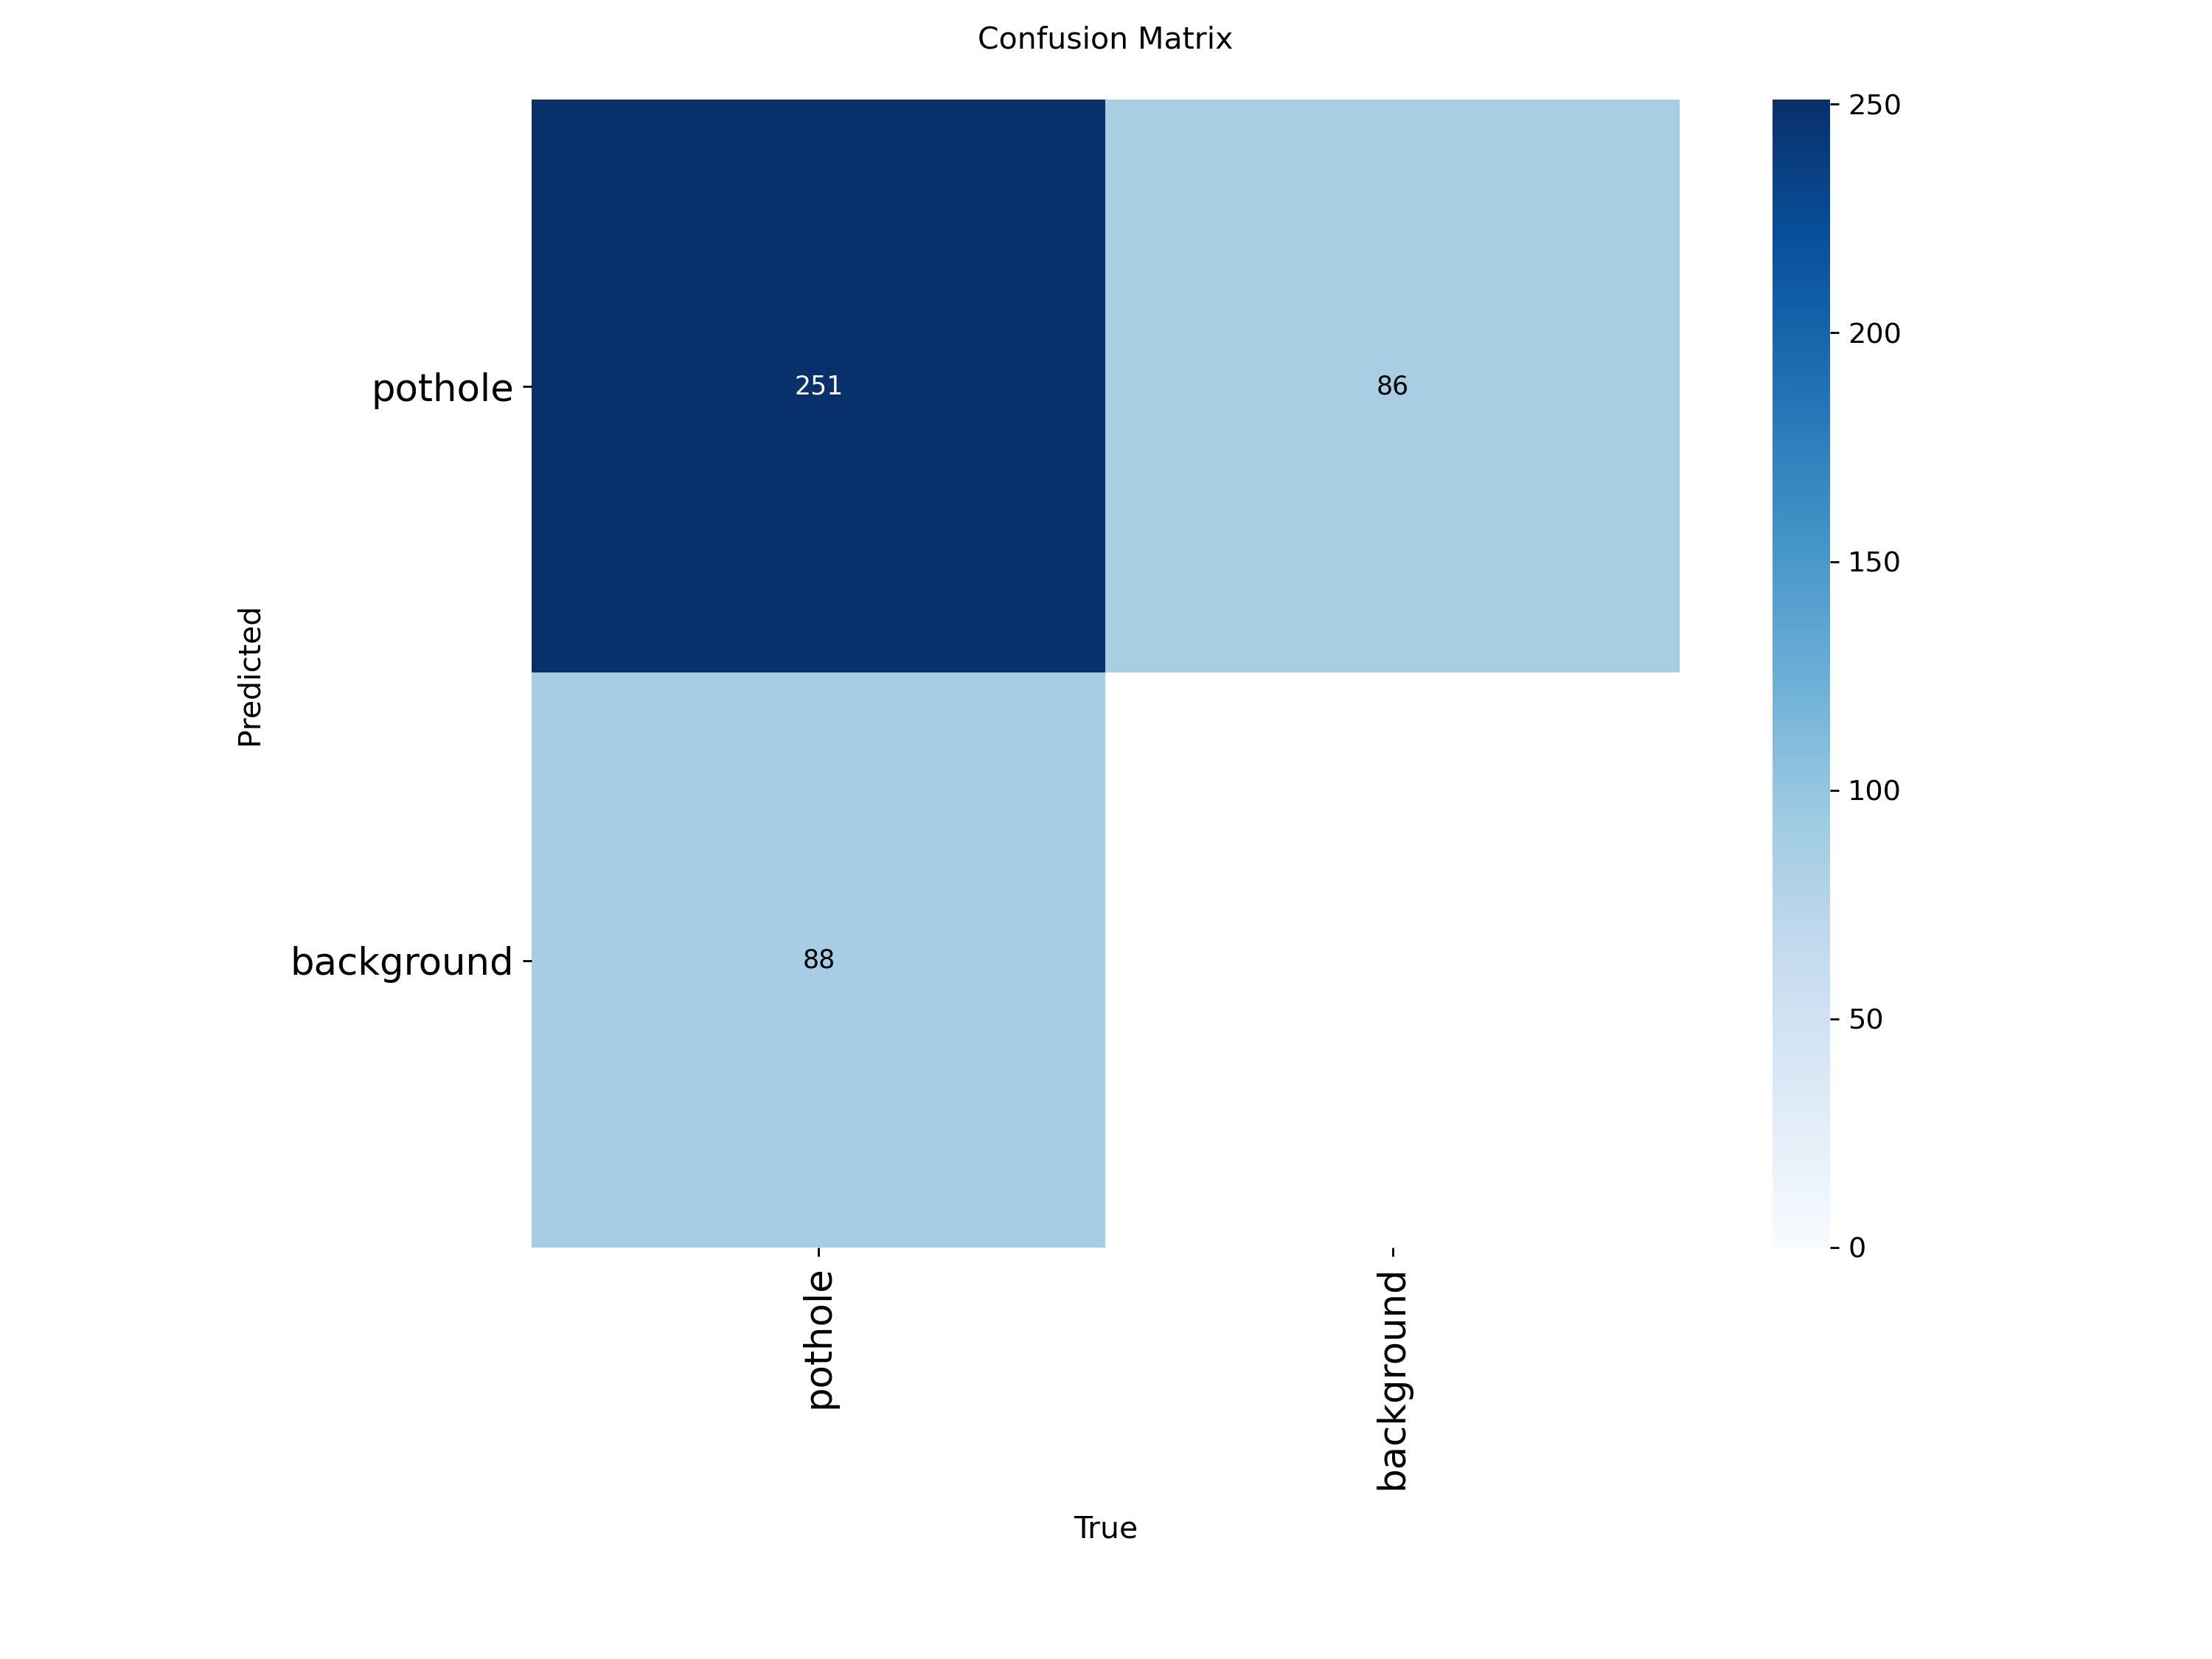

In [13]:
import os

run_dir = "/content/runs/detect/train"
best = f"{run_dir}/weights/best.pt"

from IPython.display import Image, display
for p in ["results.png", "confusion_matrix.png", "PR_curve.png", "F1_curve.png"]:
    fp = os.path.join(run_dir, p)
    if os.path.exists(fp):
        display(Image(filename=fp))


In [15]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" source="/content/test.jpeg" save=True conf=0.25


Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/test.jpeg: 416x640 9 potholes, 47.8ms
Speed: 3.7ms preprocess, 47.8ms inference, 122.5ms postprocess per image at shape (1, 3, 416, 640)
Results saved to /content/runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


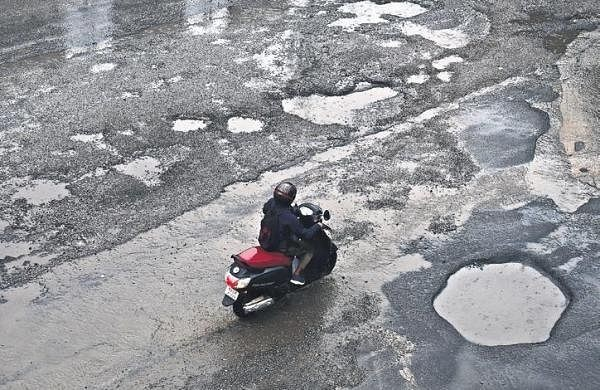

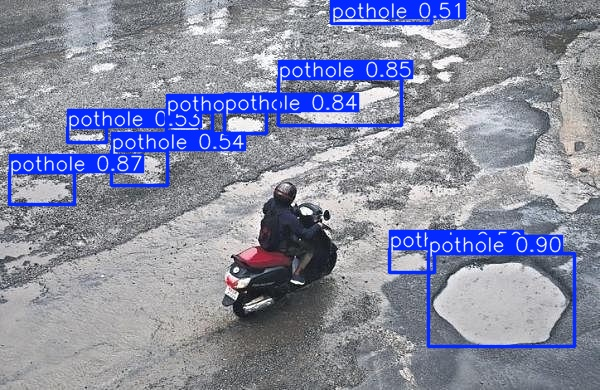

In [17]:
import os
from IPython.display import Image, display

# 1) Original input
display(Image(filename="/content/test.jpeg"))

# 2) Predicted output
predict_dir = "/content/runs/detect/predict"
pred_img = os.path.join(predict_dir, "test.jpg")  # same filename as input
display(Image(filename=pred_img))
